In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 14

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 14)                154       
                                                                 
Total params: 1,224
Trainable params: 1,224
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
30/42 [====================>.........] - ETA: 0s - loss: 2.6721 - accuracy: 0.0711 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 1s 7ms/step - loss: 2.6362 - accuracy: 0.0924 - val_loss: 2.4280 - val_accuracy: 0.2692
Epoch 2/1000
36/42 [========================>.....] - ETA: 0s - loss: 2.3915 - accuracy: 0.2233
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 3ms/step - loss: 2.3700 - accuracy: 0.2284 - val_loss: 2.1765 - val_accuracy: 0.2857
Epoch 3/1000
29/42 [===================>..........] - ETA: 0s - loss: 2.1879 - accuracy: 0.2710
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 3ms/step - loss: 2.1665 - accuracy: 0.2758 - val_loss: 1.9664 - val_accuracy: 0.3534
Epoch 4/1000
20/42 [=============>................] - ETA: 0s - loss: 2.0801 - accuracy: 0.2773


37/42 [=========================>....] - ETA: 0s - loss: 1.2088 - accuracy: 0.5378
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 5ms/step - loss: 1.2076 - accuracy: 0.5401 - val_loss: 0.8294 - val_accuracy: 0.7718
Epoch 29/1000
34/42 [=======================>......] - ETA: 0s - loss: 1.2154 - accuracy: 0.5386
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 5ms/step - loss: 1.2165 - accuracy: 0.5397 - val_loss: 0.8247 - val_accuracy: 0.7860
Epoch 30/1000
36/42 [========================>.....] - ETA: 0s - loss: 1.1868 - accuracy: 0.5488
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 5ms/step - loss: 1.1908 - accuracy: 0.5481 - val_loss: 0.8117 - val_accuracy: 0.7803
Epoch 31/1000
36/42 [========================>.....] - ETA: 0s - loss: 1.2089 - accuracy: 0.5404
Epoch 31

39/42 [==========================>...] - ETA: 0s - loss: 1.0611 - accuracy: 0.6148
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 4ms/step - loss: 1.0604 - accuracy: 0.6141 - val_loss: 0.6411 - val_accuracy: 0.8708
Epoch 56/1000
41/42 [============================>.] - ETA: 0s - loss: 1.0624 - accuracy: 0.5949
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 5ms/step - loss: 1.0618 - accuracy: 0.5946 - val_loss: 0.6397 - val_accuracy: 0.8776
Epoch 57/1000
35/42 [========================>.....] - ETA: 0s - loss: 1.0611 - accuracy: 0.6036
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 5ms/step - loss: 1.0713 - accuracy: 0.6010 - val_loss: 0.6373 - val_accuracy: 0.8748
Epoch 58/1000
28/42 [===================>..........] - ETA: 0s - loss: 1.0506 - accuracy: 0.6136
Epoch 58

25/42 [================>.............] - ETA: 0s - loss: 0.9984 - accuracy: 0.6269
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 4ms/step - loss: 0.9921 - accuracy: 0.6291 - val_loss: 0.5544 - val_accuracy: 0.8845
Epoch 83/1000
23/42 [===============>..............] - ETA: 0s - loss: 0.9665 - accuracy: 0.6488
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 4ms/step - loss: 0.9758 - accuracy: 0.6426 - val_loss: 0.5455 - val_accuracy: 0.8805
Epoch 84/1000
29/42 [===================>..........] - ETA: 0s - loss: 0.9602 - accuracy: 0.6517
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 4ms/step - loss: 0.9804 - accuracy: 0.6448 - val_loss: 0.5417 - val_accuracy: 0.8873
Epoch 85/1000
34/42 [=======================>......] - ETA: 0s - loss: 0.9714 - accuracy: 0.6455
Epoch 85

34/42 [=======================>......] - ETA: 0s - loss: 0.9663 - accuracy: 0.6443
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 5ms/step - loss: 0.9717 - accuracy: 0.6466 - val_loss: 0.5208 - val_accuracy: 0.8748
Epoch 110/1000
37/42 [=========================>....] - ETA: 0s - loss: 0.9290 - accuracy: 0.6552
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 5ms/step - loss: 0.9297 - accuracy: 0.6557 - val_loss: 0.5074 - val_accuracy: 0.8879
Epoch 111/1000
41/42 [============================>.] - ETA: 0s - loss: 0.9623 - accuracy: 0.6423
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 5ms/step - loss: 0.9621 - accuracy: 0.6428 - val_loss: 0.5147 - val_accuracy: 0.8754
Epoch 112/1000
42/42 [==============================] - ETA: 0s - loss: 0.9681 - accuracy: 0.6403
Ep

Epoch 136/1000
36/42 [========================>.....] - ETA: 0s - loss: 0.9549 - accuracy: 0.6487
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 5ms/step - loss: 0.9480 - accuracy: 0.6488 - val_loss: 0.5014 - val_accuracy: 0.8793
Epoch 137/1000
38/42 [==========================>...] - ETA: 0s - loss: 0.9351 - accuracy: 0.6513
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 5ms/step - loss: 0.9330 - accuracy: 0.6530 - val_loss: 0.5039 - val_accuracy: 0.8782
Epoch 138/1000
24/42 [================>.............] - ETA: 0s - loss: 0.9277 - accuracy: 0.6615
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 4ms/step - loss: 0.9308 - accuracy: 0.6642 - val_loss: 0.4935 - val_accuracy: 0.8788
Epoch 139/1000
26/42 [=================>............] - ETA: 0s - loss: 0.9264 - accu

Epoch 163/1000
23/42 [===============>..............] - ETA: 0s - loss: 0.9241 - accuracy: 0.6457
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 5ms/step - loss: 0.9386 - accuracy: 0.6452 - val_loss: 0.4874 - val_accuracy: 0.8867
Epoch 164/1000
37/42 [=========================>....] - ETA: 0s - loss: 0.9282 - accuracy: 0.6562
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 5ms/step - loss: 0.9302 - accuracy: 0.6568 - val_loss: 0.4831 - val_accuracy: 0.8884
Epoch 165/1000
37/42 [=========================>....] - ETA: 0s - loss: 0.9214 - accuracy: 0.6562
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 5ms/step - loss: 0.9204 - accuracy: 0.6574 - val_loss: 0.4845 - val_accuracy: 0.8845
Epoch 166/1000
32/42 [=====================>........] - ETA: 0s - loss: 0.9143 - accu

Epoch 190/1000
28/42 [===================>..........] - ETA: 0s - loss: 0.9100 - accuracy: 0.6660
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 4ms/step - loss: 0.9158 - accuracy: 0.6661 - val_loss: 0.4773 - val_accuracy: 0.8856
Epoch 191/1000
24/42 [================>.............] - ETA: 0s - loss: 0.9358 - accuracy: 0.6556
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 4ms/step - loss: 0.9359 - accuracy: 0.6507 - val_loss: 0.4814 - val_accuracy: 0.8919
Epoch 192/1000
29/42 [===================>..........] - ETA: 0s - loss: 0.9278 - accuracy: 0.6595
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 4ms/step - loss: 0.9301 - accuracy: 0.6543 - val_loss: 0.4856 - val_accuracy: 0.8930
Epoch 193/1000
22/42 [==============>...............] - ETA: 0s - loss: 0.9084 - accu

Epoch 217/1000
38/42 [==========================>...] - ETA: 0s - loss: 0.9232 - accuracy: 0.6694
Epoch 217: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 5ms/step - loss: 0.9203 - accuracy: 0.6710 - val_loss: 0.4733 - val_accuracy: 0.8867
Epoch 218/1000
32/42 [=====================>........] - ETA: 0s - loss: 0.9339 - accuracy: 0.6521
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 6ms/step - loss: 0.9345 - accuracy: 0.6553 - val_loss: 0.4807 - val_accuracy: 0.8913
Epoch 219/1000
37/42 [=========================>....] - ETA: 0s - loss: 0.8948 - accuracy: 0.6660
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 7ms/step - loss: 0.8993 - accuracy: 0.6678 - val_loss: 0.4715 - val_accuracy: 0.8884
Epoch 220/1000
38/42 [==========================>...] - ETA: 0s - loss: 0.9383 - accu

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

14/14 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.8913


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 344ms/step
[5.4147895e-02 1.8410400e-01 4.3902376e-01 3.3401299e-02 4.5697519e-08
 2.1942973e-01 1.5647641e-04 2.4558820e-02 3.4328554e-02 9.3508037e-03
 2.9707092e-04 1.2014655e-03 8.5951946e-08 2.7523660e-08]
2


# Confusion matrix

55/55 [==============================] - 0s 2ms/step


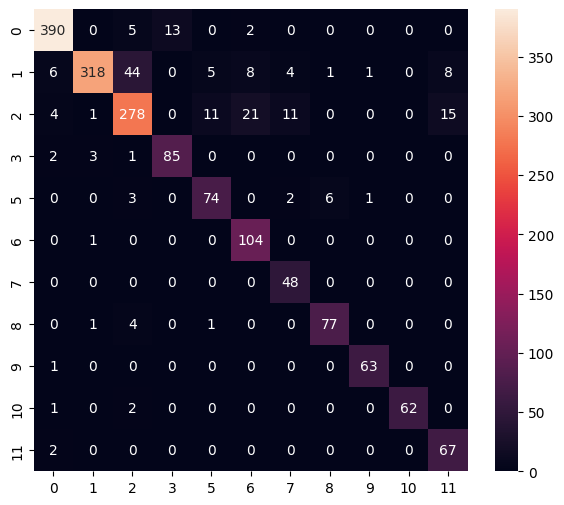

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       410
           1       0.98      0.81      0.88       395
           2       0.82      0.82      0.82       341
           3       0.87      0.93      0.90        91
           5       0.81      0.86      0.84        86
           6       0.77      0.99      0.87       105
           7       0.74      1.00      0.85        48
           8       0.92      0.93      0.92        83
           9       0.97      0.98      0.98        64
          10       1.00      0.95      0.98        65
          11       0.74      0.97      0.84        69

    accuracy                           0.89      1757
   macro avg       0.87      0.93      0.89      1757
weighted avg       0.90      0.89      0.89      1757



In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [18]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [19]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\91984\AppData\Local\Temp\tmp19s92umm\assets


INFO:tensorflow:Assets written to: C:\Users\91984\AppData\Local\Temp\tmp19s92umm\assets


6984

# Inference test

In [20]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [21]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [22]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [23]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 2.98 ms


In [24]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.4147933e-02 1.8410397e-01 4.3902376e-01 3.3401314e-02 4.5697604e-08
 2.1942967e-01 1.5647657e-04 2.4558820e-02 3.4328569e-02 9.3507990e-03
 2.9707150e-04 1.2014667e-03 8.5952188e-08 2.7523710e-08]
2
